In [1]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from timeit import default_timer

# [1] Import model
from sklearn.neighbors import KNeighborsClassifier as model_constructor

# Classification Metrics

Classification are supervised learning type of problems, which mean you have a target to predict or ground truth. Therefore, as opposed to unsupervised learning, you can compute an explicit metric that will tell you how good or bad are your model predictions, or if a particular model fits the target better than another.

We will cover in this notebook the most popular and used. In particular we will cover these evaluation techniques:

1. Confusion Matrix
2. Accuracy
3. Precission
4. Recall
5. F1-Score
6. Area Under the Curve, AUC
7. Custom Metric


## Data

No iris! 😃

In [2]:
from sklearn.datasets import load_breast_cancer as load_data;

In [3]:
data = load_data();
X = data.data;
y = data.target;

In [4]:
perc_values = [0.7, 0.15, 0.15];
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, stratify = y, test_size=perc_values[1] + perc_values[2], random_state=1);
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, stratify = y_valtest, test_size= perc_values[2] / (perc_values[1] + perc_values[2]), random_state=1)

## Metrics

### [1] Confusion Matrix

<img src="figures/confusion_matrix.png">

- **True Positives, TP**: Predicted = 1 and Real = 1. Good.


- **True Negatives, TN**: Predicted = 0 and Real = 0. Good.


- **False Positives, FP**: Predicted = 1 and Real = 0. Error.


- **False Negatives, FN**: Predicted = 0 and Real = 1. Error.

In [5]:
# 2) Import metrics
from sklearn.metrics import confusion_matrix as metric

In [6]:
params_grid = {'n_neighbors': np.arange(1, 11)}

In [7]:
num_iter = 1;
grid_results = pd.DataFrame(columns = ('k', 'confusion_train', 'confusion_val', 'time'))
for k in params_grid['n_neighbors']:
            
            # Start time
            start_time = default_timer()
        
            # Print trace
            print('Iteracion = ' + str(num_iter) + '. Parametro k = ' + str(k))
            
            # [3] Define model
            model = model_constructor(n_neighbors = k)
            
            # [4] Train model
            model.fit(X_train, y_train)
            
            # [5] Predict
            pred_train = model.predict(X_train)
            pred_val = model.predict(X_val)
            
            # [6] Compute metric
            metric_train = metric(y_train, pred_train)
            metric_val = metric(y_val, pred_val)
            
            # Computational time
            time = default_timer() - start_time
            
            # print error
            print('Confusion matrix train = %s - confusion matrix validation = %s. Time spend = %.2f.' 
                  % (metric_train, metric_val, time))         
                       
            # Save iteration results
            grid_results.loc[num_iter]=[k,
                                     metric_train,
                                     metric_val,
                                    time] 
            num_iter += 1

print('Grid Search Total Computational Time: ', np.sum(grid_results.time.values)) 

Iteracion = 1. Parametro k = 1
Confusion matrix train = [[148   0]
 [  0 250]] - confusion matrix validation = [[26  6]
 [ 3 50]]. Time spend = 0.01.
Iteracion = 2. Parametro k = 2
Confusion matrix train = [[148   0]
 [ 11 239]] - confusion matrix validation = [[29  3]
 [ 4 49]]. Time spend = 0.02.
Iteracion = 3. Parametro k = 3
Confusion matrix train = [[132  16]
 [  5 245]] - confusion matrix validation = [[25  7]
 [ 1 52]]. Time spend = 0.01.
Iteracion = 4. Parametro k = 4
Confusion matrix train = [[135  13]
 [  9 241]] - confusion matrix validation = [[27  5]
 [ 2 51]]. Time spend = 0.01.
Iteracion = 5. Parametro k = 5
Confusion matrix train = [[133  15]
 [  4 246]] - confusion matrix validation = [[26  6]
 [ 2 51]]. Time spend = 0.01.
Iteracion = 6. Parametro k = 6
Confusion matrix train = [[135  13]
 [  9 241]] - confusion matrix validation = [[28  4]
 [ 2 51]]. Time spend = 0.01.
Iteracion = 7. Parametro k = 7
Confusion matrix train = [[131  17]
 [  7 243]] - confusion matrix va

In [8]:
grid_results

,k,confusion_train,confusion_val,time
1,1,"[[148, 0], [0, 250]]","[[26, 6], [3, 50]]",0.014412
2,2,"[[148, 0], [11, 239]]","[[29, 3], [4, 49]]",0.015535
3,3,"[[132, 16], [5, 245]]","[[25, 7], [1, 52]]",0.012488
4,4,"[[135, 13], [9, 241]]","[[27, 5], [2, 51]]",0.012983
5,5,"[[133, 15], [4, 246]]","[[26, 6], [2, 51]]",0.011410
6,6,"[[135, 13], [9, 241]]","[[28, 4], [2, 51]]",0.012663
7,7,"[[131, 17], [7, 243]]","[[27, 5], [2, 51]]",0.012586
8,8,"[[134, 14], [9, 241]]","[[28, 4], [2, 51]]",0.013131
9,9,"[[131, 17], [8, 242]]","[[28, 4], [1, 52]]",0.011300
10,10,"[[131, 17], [8, 242]]","[[28, 4], [2, 51]]",0.011401


Difficult to extract best model.

Let's try to visualize it

In [9]:
from sklearn.metrics import plot_confusion_matrix
?plot_confusion_matrix

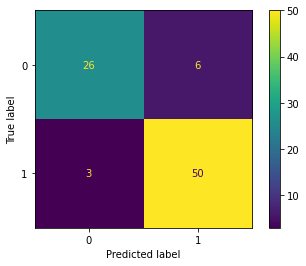

In [10]:
plot_confusion_matrix(model_constructor(n_neighbors = 1).fit(X_train, y_train),
                      X_val, 
                      y_val)  

### [2] Accuracy

<img src="figures/accuracy.png">

In [11]:
# 2) Import metrics
from sklearn.metrics import accuracy_score as metric

In [12]:
num_iter = 1;
grid_results = pd.DataFrame(columns = ('k', 'acc_train', 'acc_val', 'time'))
for k in params_grid['n_neighbors']:
            
            # Start time
            start_time = default_timer()
        
            # Print trace
            print('Iteracion = ' + str(num_iter) + '. Parametro k = ' + str(k))
            
            # [3] Define model
            model = model_constructor(n_neighbors = k)
            
            # [4] Train model
            model.fit(X_train, y_train)
            
            # [5] Predict
            pred_train = model.predict(X_train)
            pred_val = model.predict(X_val)
            
            # [6] Compute metric
            metric_train = metric(y_train, pred_train)
            metric_val = metric(y_val, pred_val)
            
            # Computational time
            time = default_timer() - start_time
            
            # print error
            print('Accuracy train = %s - Accuracy validation = %s. Time spend = %.2f.' 
                  % (metric_train, metric_val, time))         
                       
            # Save iteration results
            grid_results.loc[num_iter]=[k,
                                     metric_train,
                                     metric_val,
                                    time] 
            num_iter += 1

print('Grid Search Total Computational Time: ', np.sum(grid_results.time.values)) 

Iteracion = 1. Parametro k = 1
Accuracy train = 1.0 - Accuracy validation = 0.8941176470588236. Time spend = 0.02.
Iteracion = 2. Parametro k = 2
Accuracy train = 0.9723618090452262 - Accuracy validation = 0.9176470588235294. Time spend = 0.02.
Iteracion = 3. Parametro k = 3
Accuracy train = 0.9472361809045227 - Accuracy validation = 0.9058823529411765. Time spend = 0.02.
Iteracion = 4. Parametro k = 4
Accuracy train = 0.9447236180904522 - Accuracy validation = 0.9176470588235294. Time spend = 0.02.
Iteracion = 5. Parametro k = 5
Accuracy train = 0.9522613065326633 - Accuracy validation = 0.9058823529411765. Time spend = 0.01.
Iteracion = 6. Parametro k = 6
Accuracy train = 0.9447236180904522 - Accuracy validation = 0.9294117647058824. Time spend = 0.02.
Iteracion = 7. Parametro k = 7
Accuracy train = 0.9396984924623115 - Accuracy validation = 0.9176470588235294. Time spend = 0.01.
Iteracion = 8. Parametro k = 8
Accuracy train = 0.9422110552763819 - Accuracy validation = 0.929411764705

In [13]:
grid_results

,k,acc_train,acc_val,time
1,1.0,1.000000,0.894118,0.016169
2,2.0,0.972362,0.917647,0.015159
3,3.0,0.947236,0.905882,0.017816
4,4.0,0.944724,0.917647,0.020510
5,5.0,0.952261,0.905882,0.014985
6,6.0,0.944724,0.929412,0.015776
7,7.0,0.939698,0.917647,0.014312
8,8.0,0.942211,0.929412,0.014711
9,9.0,0.937186,0.941176,0.014201
10,10.0,0.937186,0.929412,0.013491


In [14]:
grid_results = grid_results.sort_values(by = ['acc_val', 'acc_train', 'time'], ascending = [False, False, True])
grid_results

,k,acc_train,acc_val,time
9,9.0,0.937186,0.941176,0.014201
6,6.0,0.944724,0.929412,0.015776
8,8.0,0.942211,0.929412,0.014711
10,10.0,0.937186,0.929412,0.013491
2,2.0,0.972362,0.917647,0.015159
4,4.0,0.944724,0.917647,0.020510
7,7.0,0.939698,0.917647,0.014312
5,5.0,0.952261,0.905882,0.014985
3,3.0,0.947236,0.905882,0.017816
1,1.0,1.000000,0.894118,0.016169


Best model is k = 9

class non-fraudulent = 99.84%.
class fraudulent = 0.16%.

### [3] Precision

<img src="figures/precision.png">

In [15]:
# 2) Import metrics
from sklearn.metrics import precision_score as metric

In [16]:
num_iter = 1;
grid_results = pd.DataFrame(columns = ('k', 'precision_train', 'precision_val', 'time'))
for k in params_grid['n_neighbors']:
            
            # Start time
            start_time = default_timer()
        
            # Print trace
            print('Iteracion = ' + str(num_iter) + '. Parametro k = ' + str(k))
            
            # [3] Define model
            model = model_constructor(n_neighbors = k)
            
            # [4] Train model
            model.fit(X_train, y_train)
            
            # [5] Predict
            pred_train = model.predict(X_train)
            pred_val = model.predict(X_val)
            
            # [6] Compute metric
            metric_train = metric(y_train, pred_train)
            metric_val = metric(y_val, pred_val)
            
            # Computational time
            time = default_timer() - start_time
            
            # print error
            print('Precision train = %s - Precision validation = %s. Time spend = %.2f.' 
                  % (metric_train, metric_val, time))         
                       
            # Save iteration results
            grid_results.loc[num_iter]=[k,
                                     metric_train,
                                     metric_val,
                                    time] 
            num_iter += 1

print('Grid Search Total Computational Time: ', np.sum(grid_results.time.values)) 

Iteracion = 1. Parametro k = 1
Precision train = 1.0 - Precision validation = 0.8928571428571429. Time spend = 0.02.
Iteracion = 2. Parametro k = 2
Precision train = 1.0 - Precision validation = 0.9423076923076923. Time spend = 0.01.
Iteracion = 3. Parametro k = 3
Precision train = 0.9386973180076629 - Precision validation = 0.8813559322033898. Time spend = 0.01.
Iteracion = 4. Parametro k = 4
Precision train = 0.9488188976377953 - Precision validation = 0.9107142857142857. Time spend = 0.01.
Iteracion = 5. Parametro k = 5
Precision train = 0.9425287356321839 - Precision validation = 0.8947368421052632. Time spend = 0.01.
Iteracion = 6. Parametro k = 6
Precision train = 0.9488188976377953 - Precision validation = 0.9272727272727272. Time spend = 0.01.
Iteracion = 7. Parametro k = 7
Precision train = 0.9346153846153846 - Precision validation = 0.9107142857142857. Time spend = 0.01.
Iteracion = 8. Parametro k = 8
Precision train = 0.9450980392156862 - Precision validation = 0.92727272727

In [17]:
grid_results

,k,precision_train,precision_val,time
1,1.0,1.000000,0.892857,0.017885
2,2.0,1.000000,0.942308,0.014556
3,3.0,0.938697,0.881356,0.014520
4,4.0,0.948819,0.910714,0.014152
5,5.0,0.942529,0.894737,0.011223
6,6.0,0.948819,0.927273,0.013393
7,7.0,0.934615,0.910714,0.012319
8,8.0,0.945098,0.927273,0.013906
9,9.0,0.934363,0.928571,0.012142
10,10.0,0.934363,0.927273,0.015102


In [18]:
grid_results = grid_results.sort_values(by = ['precision_val', 'precision_train', 'time'], ascending = [False, False, True])
grid_results

,k,precision_train,precision_val,time
2,2.0,1.000000,0.942308,0.014556
9,9.0,0.934363,0.928571,0.012142
6,6.0,0.948819,0.927273,0.013393
8,8.0,0.945098,0.927273,0.013906
10,10.0,0.934363,0.927273,0.015102
4,4.0,0.948819,0.910714,0.014152
7,7.0,0.934615,0.910714,0.012319
5,5.0,0.942529,0.894737,0.011223
1,1.0,1.000000,0.892857,0.017885
3,3.0,0.938697,0.881356,0.014520


Best model is k = 2

### [4] Recall

<img src="figures/recall.png">

In [20]:
# 2) Import metrics
from sklearn.metrics import recall_score as metric

In [21]:
num_iter = 1;
grid_results = pd.DataFrame(columns = ('k', 'recall_train', 'recall_val', 'time'))
for k in params_grid['n_neighbors']:
            
            # Start time
            start_time = default_timer()
        
            # Print trace
            print('Iteracion = ' + str(num_iter) + '. Parametro k = ' + str(k))
            
            # [3] Define model
            model = model_constructor(n_neighbors = k)
            
            # [4] Train model
            model.fit(X_train, y_train)
            
            # [5] Predict
            pred_train = model.predict(X_train)
            pred_val = model.predict(X_val)
            
            # [6] Compute metric
            metric_train = metric(y_train, pred_train)
            metric_val = metric(y_val, pred_val)
            
            # Computational time
            time = default_timer() - start_time
            
            # print error
            print('Recall train = %s - Recall validation = %s. Time spend = %.2f.' 
                  % (metric_train, metric_val, time))         
                       
            # Save iteration results
            grid_results.loc[num_iter]=[k,
                                     metric_train,
                                     metric_val,
                                    time] 
            num_iter += 1

print('Grid Search Total Computational Time: ', np.sum(grid_results.time.values)) 

Iteracion = 1. Parametro k = 1
Recall train = 1.0 - Recall validation = 0.9433962264150944. Time spend = 0.01.
Iteracion = 2. Parametro k = 2
Recall train = 0.956 - Recall validation = 0.9245283018867925. Time spend = 0.01.
Iteracion = 3. Parametro k = 3
Recall train = 0.98 - Recall validation = 0.9811320754716981. Time spend = 0.01.
Iteracion = 4. Parametro k = 4
Recall train = 0.964 - Recall validation = 0.9622641509433962. Time spend = 0.01.
Iteracion = 5. Parametro k = 5
Recall train = 0.984 - Recall validation = 0.9622641509433962. Time spend = 0.01.
Iteracion = 6. Parametro k = 6
Recall train = 0.964 - Recall validation = 0.9622641509433962. Time spend = 0.01.
Iteracion = 7. Parametro k = 7
Recall train = 0.972 - Recall validation = 0.9622641509433962. Time spend = 0.01.
Iteracion = 8. Parametro k = 8
Recall train = 0.964 - Recall validation = 0.9622641509433962. Time spend = 0.01.
Iteracion = 9. Parametro k = 9
Recall train = 0.968 - Recall validation = 0.9811320754716981. Time 

In [22]:
grid_results

,k,recall_train,recall_val,time
1,1.0,1.000,0.943396,0.013759
2,2.0,0.956,0.924528,0.013247
3,3.0,0.980,0.981132,0.012973
4,4.0,0.964,0.962264,0.014871
5,5.0,0.984,0.962264,0.014349
6,6.0,0.964,0.962264,0.013053
7,7.0,0.972,0.962264,0.012410
8,8.0,0.964,0.962264,0.013432
9,9.0,0.968,0.981132,0.016839
10,10.0,0.968,0.962264,0.013946


In [23]:
grid_results = grid_results.sort_values(by = ['recall_val', 'recall_train', 'time'], ascending = [False, False, True])
grid_results

,k,recall_train,recall_val,time
3,3.0,0.980,0.981132,0.012973
9,9.0,0.968,0.981132,0.016839
5,5.0,0.984,0.962264,0.014349
7,7.0,0.972,0.962264,0.012410
10,10.0,0.968,0.962264,0.013946
6,6.0,0.964,0.962264,0.013053
8,8.0,0.964,0.962264,0.013432
4,4.0,0.964,0.962264,0.014871
1,1.0,1.000,0.943396,0.013759
2,2.0,0.956,0.924528,0.013247


Best model is k = 3

### [5] F1_score

<img src="figures/f1_score.png">

In [24]:
# 2) Import metrics
from sklearn.metrics import f1_score as metric

In [25]:
num_iter = 1;
grid_results = pd.DataFrame(columns = ('k', 'f1_train', 'f1_val', 'time'))
for k in params_grid['n_neighbors']:
            
            # Start time
            start_time = default_timer()
        
            # Print trace
            print('Iteracion = ' + str(num_iter) + '. Parametro k = ' + str(k))
            
            # [3] Define model
            model = model_constructor(n_neighbors = k)
            
            # [4] Train model
            model.fit(X_train, y_train)
            
            # [5] Predict
            pred_train = model.predict(X_train)
            pred_val = model.predict(X_val)
            
            # [6] Compute metric
            metric_train = metric(y_train, pred_train)
            metric_val = metric(y_val, pred_val)
            
            # Computational time
            time = default_timer() - start_time
            
            # print error
            print('F1-score train = %s - F1-score validation = %s. Time spend = %.2f.' 
                  % (metric_train, metric_val, time))         
                       
            # Save iteration results
            grid_results.loc[num_iter]=[k,
                                     metric_train,
                                     metric_val,
                                    time] 
            num_iter += 1

print('Grid Search Total Computational Time: ', np.sum(grid_results.time.values)) 

Iteracion = 1. Parametro k = 1
F1-score train = 1.0 - F1-score validation = 0.9174311926605505. Time spend = 0.02.
Iteracion = 2. Parametro k = 2
F1-score train = 0.9775051124744376 - F1-score validation = 0.9333333333333333. Time spend = 0.01.
Iteracion = 3. Parametro k = 3
F1-score train = 0.9589041095890412 - F1-score validation = 0.9285714285714285. Time spend = 0.02.
Iteracion = 4. Parametro k = 4
F1-score train = 0.9563492063492063 - F1-score validation = 0.9357798165137615. Time spend = 0.01.
Iteracion = 5. Parametro k = 5
F1-score train = 0.9628180039138943 - F1-score validation = 0.9272727272727272. Time spend = 0.01.
Iteracion = 6. Parametro k = 6
F1-score train = 0.9563492063492063 - F1-score validation = 0.9444444444444444. Time spend = 0.01.
Iteracion = 7. Parametro k = 7
F1-score train = 0.9529411764705882 - F1-score validation = 0.9357798165137615. Time spend = 0.01.
Iteracion = 8. Parametro k = 8
F1-score train = 0.9544554455445544 - F1-score validation = 0.944444444444

In [26]:
grid_results

,k,f1_train,f1_val,time
1,1.0,1.000000,0.917431,0.015016
2,2.0,0.977505,0.933333,0.012184
3,3.0,0.958904,0.928571,0.015625
4,4.0,0.956349,0.935780,0.013751
5,5.0,0.962818,0.927273,0.012647
6,6.0,0.956349,0.944444,0.011872
7,7.0,0.952941,0.935780,0.011337
8,8.0,0.954455,0.944444,0.011552
9,9.0,0.950884,0.954128,0.012348
10,10.0,0.950884,0.944444,0.013476


In [27]:
grid_results = grid_results.sort_values(by = ['f1_val', 'f1_train', 'time'], ascending = [False, False, True])
grid_results

,k,f1_train,f1_val,time
9,9.0,0.950884,0.954128,0.012348
6,6.0,0.956349,0.944444,0.011872
8,8.0,0.954455,0.944444,0.011552
10,10.0,0.950884,0.944444,0.013476
4,4.0,0.956349,0.935780,0.013751
7,7.0,0.952941,0.935780,0.011337
2,2.0,0.977505,0.933333,0.012184
3,3.0,0.958904,0.928571,0.015625
5,5.0,0.962818,0.927273,0.012647
1,1.0,1.000000,0.917431,0.015016


Best model is k = 9

### [6] Area Under the Curve, AUC

<img src="figures/auc.png">

**Important note!!!:** To compute AUC you need to pass predictions as probabilities, not labels.

In [28]:
# 2) Import metrics
from sklearn.metrics import roc_auc_score as metric
?metric

In [29]:
num_iter = 1;
grid_results = pd.DataFrame(columns = ('k', 'auc_train', 'auc_val', 'time'))
for k in params_grid['n_neighbors']:
            
            # Start time
            start_time = default_timer()
        
            # Print trace
            print('Iteracion = ' + str(num_iter) + '. Parametro k = ' + str(k))
            
            # [3] Define model
            model = model_constructor(n_neighbors = k)
            
            # [4] Train model
            model.fit(X_train, y_train)
            
            # [5] Predict
            pred_train = model.predict_proba(X_train)[:, 1] # predict_proba!!!
            pred_val = model.predict_proba(X_val)[:, 1] # predict_proba!!!
            
            # [6] Compute metric
            metric_train = metric(y_train, pred_train)
            metric_val = metric(y_val, pred_val)
            
            # Computational time
            time = default_timer() - start_time
            
            # print error
            print('AUC train = %s - AUC validation = %s. Time spend = %.2f.' 
                  % (metric_train, metric_val, time))         
                       
            # Save iteration results
            grid_results.loc[num_iter]=[k,
                                     metric_train,
                                     metric_val,
                                    time] 
            num_iter += 1

print('Grid Search Total Computational Time: ', np.sum(grid_results.time.values)) 

Iteracion = 1. Parametro k = 1
AUC train = 1.0 - AUC validation = 0.8779481132075472. Time spend = 0.01.
Iteracion = 2. Parametro k = 2
AUC train = 0.9968783783783783 - AUC validation = 0.9339622641509434. Time spend = 0.01.
Iteracion = 3. Parametro k = 3
AUC train = 0.9929729729729729 - AUC validation = 0.9510613207547169. Time spend = 0.01.
Iteracion = 4. Parametro k = 4
AUC train = 0.9920675675675675 - AUC validation = 0.9587264150943396. Time spend = 0.01.
Iteracion = 5. Parametro k = 5
AUC train = 0.9908918918918919 - AUC validation = 0.9543042452830188. Time spend = 0.01.
Iteracion = 6. Parametro k = 6
AUC train = 0.9888783783783784 - AUC validation = 0.9557783018867925. Time spend = 0.01.
Iteracion = 7. Parametro k = 7
AUC train = 0.987054054054054 - AUC validation = 0.9551886792452831. Time spend = 0.01.
Iteracion = 8. Parametro k = 8
AUC train = 0.9862567567567567 - AUC validation = 0.9708136792452831. Time spend = 0.01.
Iteracion = 9. Parametro k = 9
AUC train = 0.98613513513

In [30]:
grid_results

,k,auc_train,auc_val,time
1,1.0,1.000000,0.877948,0.006120
2,2.0,0.996878,0.933962,0.006549
3,3.0,0.992973,0.951061,0.007285
4,4.0,0.992068,0.958726,0.006871
5,5.0,0.990892,0.954304,0.007265
6,6.0,0.988878,0.955778,0.005941
7,7.0,0.987054,0.955189,0.006682
8,8.0,0.986257,0.970814,0.006588
9,9.0,0.986135,0.971403,0.005309
10,10.0,0.985703,0.970224,0.005313


In [31]:
grid_results = grid_results.sort_values(by = ['auc_val', 'auc_train', 'time'], ascending = [False, False, True])
grid_results

,k,auc_train,auc_val,time
9,9.0,0.986135,0.971403,0.005309
8,8.0,0.986257,0.970814,0.006588
10,10.0,0.985703,0.970224,0.005313
4,4.0,0.992068,0.958726,0.006871
6,6.0,0.988878,0.955778,0.005941
7,7.0,0.987054,0.955189,0.006682
5,5.0,0.990892,0.954304,0.007265
3,3.0,0.992973,0.951061,0.007285
2,2.0,0.996878,0.933962,0.006549
1,1.0,1.000000,0.877948,0.006120


Best model is k = 9

Let's plot ROC curve for the best model.

In [32]:
from sklearn.metrics import plot_roc_curve
?plot_roc_curve

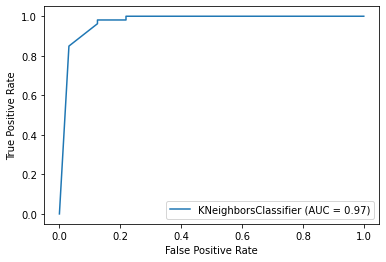

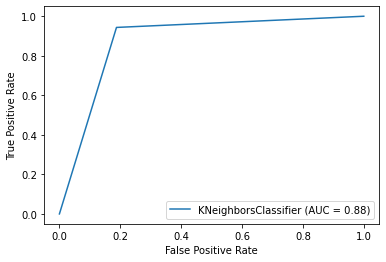

In [33]:
plot_roc_curve(model_constructor(n_neighbors = 9).fit(X_train, y_train), X_val, y_val)  
plot_roc_curve(model_constructor(n_neighbors = 1).fit(X_train, y_train), X_val, y_val)  

## Multiclassification

What happens when we have more than two classes, so we are in a multiclassification problem and not a binary problem (2 classes)?

Try to guess...

Different approaches are possible, but normally the selected metric is computed for each two classes and the results averaged to get a final metric for the classification problem, i.e. the problem is decomposed in several binary problems and the errors of each one averaged.

## Exercise

Combine all the grid results obtained for each of the metrics covered. Then decide a rule to select the best model that combines the results of different metrics. 

Select different combinations and check if the model selected as the best one also changes.

What conclusions can you draw for this?

In [53]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

ImportError: cannot import name 'precision_recall_curve_score' from 'sklearn.metrics' (C:\Users\jesus\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

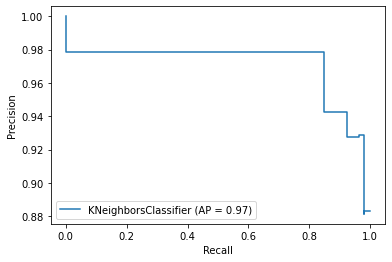

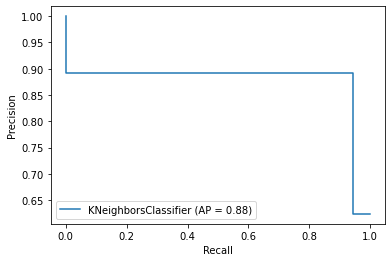

In [50]:
plot_precision_recall_curve(model_constructor(n_neighbors = 9).fit(X_train, y_train),
                            X_val,
                            y_val)
plot_precision_recall_curve(model_constructor(n_neighbors = 1).fit(X_train, y_train), 
                            X_val, 
                            y_val)

In [51]:
precision, recall, thresholds = precision_recall_curve(y_train, pred_train)

In [52]:
auc_value = auc(recall, precision)
auc_value

0.9915337773638411